## 베이지안통계학 기말과제

관심있는 데이터를 찾아서 빈도록적 방법과 베이지안 방법을 활용해서 비교분석을 실시하고 분석보고서 제출

### 1. 관심있는 데이터 찾기

#### (1) 관심 데이터: 취업건수 ~ 구인인원수 + 구직인원수
- 관심있는 데이터는 우리나라 취업건수이다.
- 취업건수는 노동시장의 변화를 나타내는 대표적인 통계 중의 하나이므로 취업건수를 예측할 수 있다면 정책적으로 중요한 예측이 될 것으로 생각한다.
- 취업은 일자리를 찾는 구직자와 일할 사람을 찾는 구인자가 서로 조건에 맞는 사람을 찾을 수 있는지에 달려있다.
- 개인의 관점에서 볼 때는 임금, 근로시간, 근무장소, 직무내용 등 다양한 요소가 취업에 영향을 미치지만, 전체 노동시장의 관점에서는 보다 거시적인 지표를 기준으로 취업건수를 예상할 수 있지 않을까 생각해보았다.
- 전체 노동시장의 관점에서 취업건수에 가장 큰 영향을 미치는 요인은 구인인원수와 구직인원수라고 할 수 있다.
- 일자리 매칭의 확률이 크게 낮아지지 않는다면 구인인원수와 구직인원수가 증가함에 따라 취업건수가 증가할 것이라고 예측할 수 있다.
- 취업건수를 종속변수로 두고, 구인인원수와 구직인원수를 독립변수로 하여 분석을 실시하려고 한다.

#### (2) 데이터 구하기

- 고용노동부에서 운영중인 고용노동데이터 분석시스템(eis.work.go.kr/elds)에서는 다양한 고용노동 관련 데이터를 공개하고 있다.

<img src="./elds1.png" width="800" />

- 고용노동데이터 분석시스템 홈페이지에서 [고객지원] 메뉴의 [공공용 데이터다운로드] 게시판에는 13종의 고용노동 관련 정보가 공개되어 있다.
  - 한국고용정보원에서 매월 글을 수정하면서 최신 데이터로 업데이트 하고 있다.
- 이 중에서 '구인현황(월)', '구직현황(월)', '취업현황_시군구(월)' 자료를 활용하려고 한다.
- '구인현황(월)'에는 2017년부터 2023년까지 매월 신규구인인원수가 몇명인지 기록되어 있다.
  - 컬럼은 마감년월|근무시도|근무시군구|표준산업대분류|표준산업중분류|표준산업소분류|산업버전|규모|직종중분류|직종버전|고용형태|학력|신규구인인원수 으로 구분된다.
- '구직현황(월)'에는 2017년부터 2023년까지 매월 신규구직인원수가 몇명인지 기록되어 있다.
  - 컬럼은 마감년월|직종중분류|직종버전|고용형태|거주시도|거주시군구|성별|연령5세단위|학력|신규구직인원수 으로 구분된다.
- '취업현황_시군구(월)'에는 2017년부터 2023년까지 매월 취업건수가 몇명인지 기록되어 있다.
  - 컬럼은 마감년월|근무시도|근무시군구|표준산업대분류|산업버전|직종중분류|직종버전|고용형태|거주시도|거주시군구|성별|연령5세단위|학력|취업건수 으로 구분된다.
- 각각의 데이터셋은 구분자로 '|'를 사용하며, 별도의 엑셀파일을 통해 자세한 데이터셋 레이아웃과 코드를 제공한다.
- 각각의 파일을 다운로드 받고, 파일명을 변경하였다.

<img src="./elds2.png" width="1000" />

<img src="./elds3.png" width="1000" />

<img src="./elds4.png" width="600" />

#### (3) 데이터 읽기

- R을 사용하여 데이터를 분석하기 위해서 저장된 데이터를 dataframe 변수에 입력하는 작업을 실시한다.
- 구인인원 자료는 rc(recruit) 변수에, 구직인원 자료는 fj(find job) 변수에, 취업건수 자료는 jm(job matching) 변수에 각각 저장한다.
- 데이터를 확인하기 위해 특별한 작업없이 그대로 읽는다.

In [42]:
# 구인인원 파일 이름 리스트 작성
file_names <- c(  
  "recruit_2017.txt",
  "recruit_2018.txt",
  "recruit_2019.txt",
  "recruit_2020.txt",
  "recruit_2021.txt",
  "recruit_2022.txt",
  "recruit_2023.txt"
)

# 파일을 하나씩 읽어서 병합
rc <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [43]:
# 구인인원 자료 읽기 결과 확인
head(rc)
nrow(rc) # 707만 줄의 데이터가 존재한다.

,마감년월,근무시도,근무시군구,표준산업대분류,표준산업중분류,표준산업소분류,산업버전,규모,직종중분류,직종버전,고용형태,학력,신규구인인원수
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,201712,26,26530,S,95,952,10,1,150000,2007,10,9,2
2,201712,41,41430,C,28,281,10,1,150000,2007,10,4,1
3,201712,41,41310,N,74,742,10,1,110000,2007,10,9,1
4,201712,11,11500,Q,87,871,10,2,60000,2007,11,9,1
5,201712,30,30230,J,61,612,10,1,200000,2007,10,3,1
6,201712,41,41570,C,29,291,10,2,190000,2007,10,9,1


[1] 7074327

In [44]:
# 구직인원 파일 이름 리스트 작성
file_names <- c(  
  "find_job_2017.txt",
  "find_job_2018.txt",
  "find_job_2019.txt",
  "find_job_2020.txt",
  "find_job_2021.txt",
  "find_job_2022.txt",
  "find_job_2023.txt"
)

# 파일을 하나씩 읽어서 병합
fj <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [45]:
# 구직인원 자료 읽기 결과 확인
head(fj)
nrow(fj) # 2490만줄의 데이터가 존재한다.

,마감년월,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,신규구직인원수
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,70000,2007,10,45,45130,M,3,4,1
2,201712,130000,2007,10,48,48310,M,6,5,1
3,201712,40000,2007,10,45,45130,F,3,4,2
4,201712,60000,2007,10,45,45130,F,8,3,3
5,201712,150000,2007,10,45,45130,M,4,3,2
6,201712,190000,2007,99,45,45130,M,4,5,1


[1] 24907211

In [46]:
# 취업건수 파일 이름 리스트 작성
file_names <- c(  
  "job_matching_2017.txt",
  "job_matching_2018.txt",
  "job_matching_2019.txt",
  "job_matching_2020.txt",
  "job_matching_2021.txt",
  "job_matching_2022.txt",
  "job_matching_2023.txt"
)

# 파일을 하나씩 읽어서 병합
jm <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [47]:
# 취업건수 자료 읽기 결과 확인
head(jm)
nrow(jm) # 941만줄의 데이터가 존재한다.

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,26,26000,y,y,110000,2007,10,26,26200,M,10,3,2
2,201712,26,26320,y,y,220000,2007,99,26,26320,M,10,3,1
3,201712,41,41130,y,y,110000,2007,10,41,41610,M,11,3,1
4,201712,42,42810,y,y,230000,2007,20,42,42810,M,7,3,1
5,201712,43,43113,S,10,120000,2007,10,43,43114,F,3,5,1
6,201712,11,11380,y,y,110000,2007,10,11,11380,F,3,4,1


[1] 9412398

#### (4) 가설 수립 및 그에 따른 데이터 병합하기

- 신규구인인원수, 신규구직인원수, 취업건수 데이터를 읽어본 결과 상당한 양의 데이터가 존재한다는 것을 알게 되었다.
- 데이터의 양도 방대하고, 변수도 매우 많기 때문에 어떻게 분석할 것인지를 고민하였다.
- 우선 가장 직관적이고 신뢰할 수 있는 가설을 검증해보는 것부터 시작하기로 했다.
- 취업건수는 신규구인인원수와 신규구직인원수의 증감에 영향을 받을 것으로 예상할 수 있다.
  - 문제는 구인, 구직과 취업 사이에 다소의 시간차가 존재한다는 것이다.
  - 따라서 해당 월의 신규구인인원수, 신규구직인원수가 곧바로 취업건수에 영향을 미친다고 예상하기는 어렵다.
  - 그래서 취업건수에 영향을 미치는 기간을 ①해당월, ②해당월+직전월, ③직전3개월, ④직전6개월 로 나누어 분석해보려고 한다.
  - 신규구인인원수와 신규구직인원수에 대해 각각의 기간을 적용하면 총 8개의 독립변수가 생성된다.
  - 단순 합을 사용하면 수치의 크기가 영향을 줄 수 있다고 판단되어, 해당 기간만큼 나누어 평균신규구인인원수, 평균신규구직인원수를 사용하였다.

- 우선은 각 데이터 셋이 너무 세분화되어 있기 때문에 마감년월 기준으로 합하는 작업을 하였다.

In [48]:
# 마감년월 기준으로 부분합을 구하여 데이터셋을 요약한다.
rc2 = aggregate(신규구인인원수 ~ 마감년월, data=rc, sum, na.rm=TRUE)
fj2 = aggregate(신규구직인원수 ~ 마감년월, data=fj, sum, na.rm=TRUE)
jm2 = aggregate(취업건수 ~ 마감년월, data=jm, sum, na.rm=TRUE)

In [49]:
# rc2, fj2, jm2 데이터셋을 마감년월을 기준으로 병합
agg <- merge(rc2, fj2, by = "마감년월", all = TRUE)
agg <- merge(agg, jm2, by = "마감년월", all = TRUE)

# 결과 확인
head(agg)

,마감년월,신규구인인원수,신규구직인원수,취업건수
,<int>,<int>,<int>,<int>
1,201701,224983,426861,161230
2,201702,252792,382156,177487
3,201703,291239,439622,232056
4,201704,227691,393868,186073
5,201705,240140,389291,163494
6,201706,262634,417662,179860


- 마감년월이 int 6자리 데이터로 입력되어 있는데, 분석을 위해서는 변환이 필요하다 생각되었다.
- 201701 -> 1로 201702 -> 2로 ... 202312 -> 84가 되도록 마감년월 컬럼을 변환하였다.

In [50]:
# 마감년월을 1부터 시작하는 연속된 숫자로 변환
agg$마감년월 <- seq_along(agg$마감년월)

# 결과 확인
head(agg)

,마감년월,신규구인인원수,신규구직인원수,취업건수
,<int>,<int>,<int>,<int>
1,1,224983,426861,161230
2,2,252792,382156,177487
3,3,291239,439622,232056
4,4,227691,393868,186073
5,5,240140,389291,163494
6,6,262634,417662,179860


- 통합된 데이터가 대략 어떤 값을 가지는지 확인할 필요가 있다.
- 신규구인인원수는 121563~306400, 신규구직인원수는 277838~605342, 취업건수는 93504~232056 사이의 값을 가진다.

In [51]:
summary(agg)

    마감년월     신규구인인원수   신규구직인원수      취업건수     
 Min.   : 1.00   Min.   :121563   Min.   :277838   Min.   : 93504  
 1st Qu.:21.75   1st Qu.:182455   1st Qu.:344173   1st Qu.:129242  
 Median :42.50   Median :225365   Median :378638   Median :141741  
 Mean   :42.50   Mean   :220412   Mean   :381199   Mean   :145304  
 3rd Qu.:63.25   3rd Qu.:250477   3rd Qu.:407366   3rd Qu.:155430  
 Max.   :84.00   Max.   :306400   Max.   :605342   Max.   :232056  

- 연도별로 월별 신규구인인원수, 신규구직인원수, 취업건수가 각각 어느정도 수준인지 파악하기 위해 막대그래프를 그려보았다.
- 총 84개월의 데이터를 한 번에 보기는 어렵기 때문에 연도별로 나누어 보았다.
- 2017년과 2023년의 그래프를 그렸다.

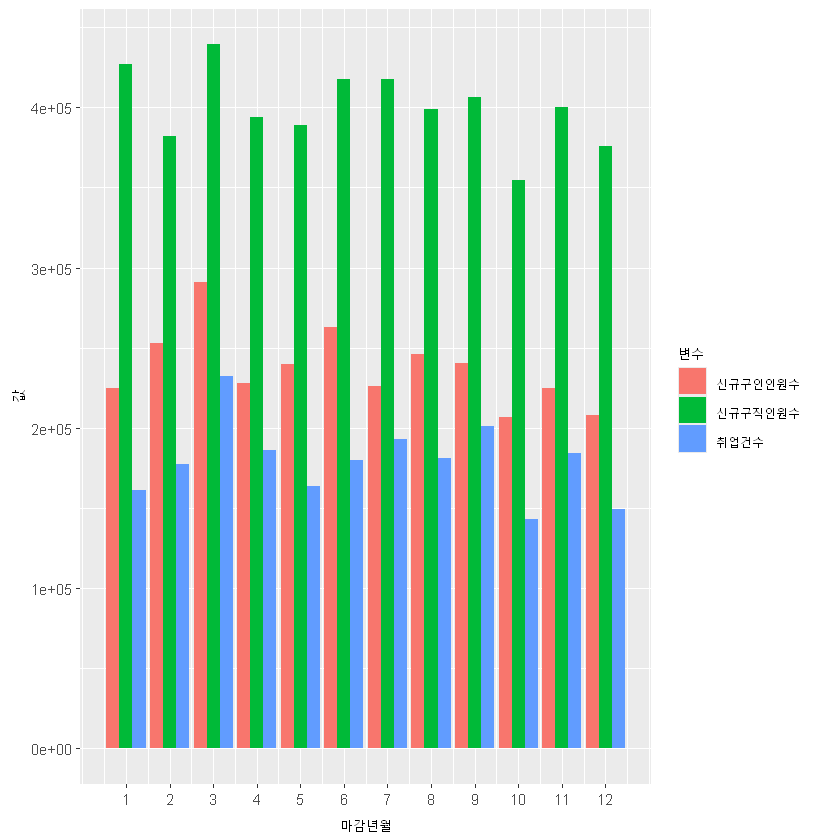

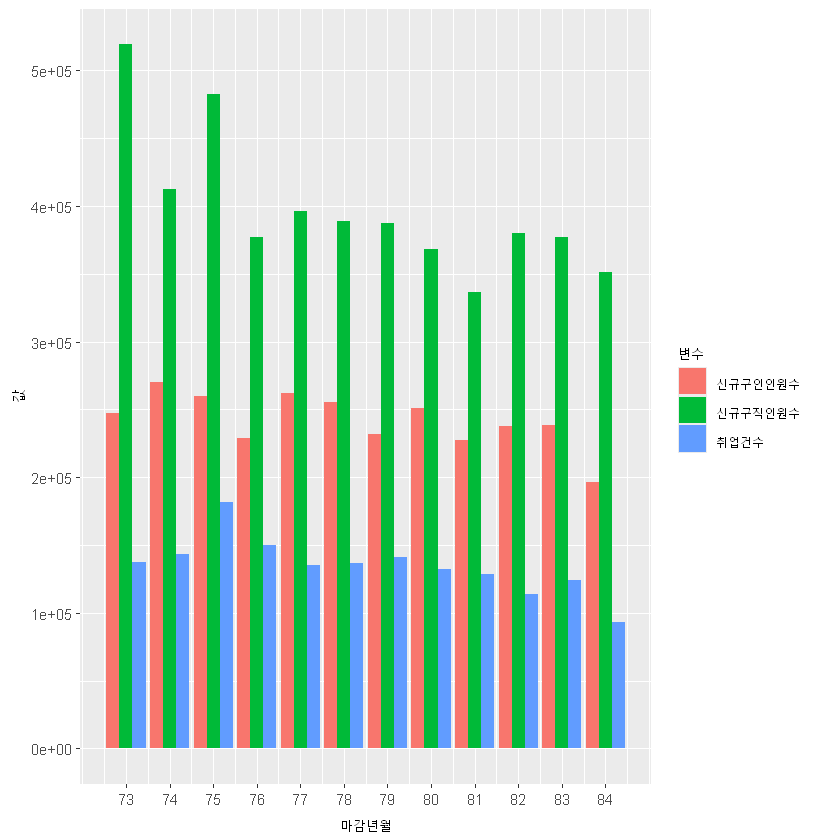

In [52]:
library(ggplot2)
library(reshape2)

# 2017년 데이터 필터링
agg_2017 <- subset(agg, 마감년월 <= 12)

# 데이터 long 형태로 변환
agg_2017_long <- melt(agg_2017, id.vars = "마감년월", 
                      measure.vars = c("신규구인인원수", "신규구직인원수", "취업건수"),
                      variable.name = "변수", 
                      value.name = "값")

# 2017년 그래프 그리기
ggplot(agg_2017_long, aes(x = 마감년월, y = 값, fill = 변수)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_x_continuous(breaks = 1:12)

# 2023년 데이터 필터링
agg_2023 <- subset(agg, 마감년월 >= 73)

# 데이터 long 형태로 변환
agg_2023_long <- melt(agg_2023, id.vars = "마감년월", 
                      measure.vars = c("신규구인인원수", "신규구직인원수", "취업건수"),
                      variable.name = "변수", 
                      value.name = "값")

# 2023년 그래프 그리기
ggplot(agg_2023_long, aes(x = 마감년월, y = 값, fill = 변수)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_x_continuous(breaks = 73:84)

- 분석을 보다 원활하게 하기 위해 컬럼명을 변경하였다.

In [53]:
# 컬럼명 변경
names(agg)[names(agg) == "마감년월"] <- "month"
names(agg)[names(agg) == "신규구인인원수"] <- "rc"
names(agg)[names(agg) == "신규구직인원수"] <- "fj"
names(agg)[names(agg) == "취업건수"] <- "jm"

In [54]:
head(agg)

,month,rc,fj,jm
,<int>,<int>,<int>,<int>
1,1,224983,426861,161230
2,2,252792,382156,177487
3,3,291239,439622,232056
4,4,227691,393868,186073
5,5,240140,389291,163494
6,6,262634,417662,179860


- 이제 2017년 1월부터 2023년 12월까지의 rc(신규구인인원수), fj(신규구직인원수), jm(취업건수) 데이터를 얻었다.
- 시차를 감안하여 검증해야 할 가설을 다시 생각해보면 2017년 7월의 취업건수는 ①해당월, ②해당월+직전월, ③직전3개월, ④직전6개월 의 rc와 fj에 영향을 받을 수 있다는 내용이다.
- 따라서, 데이터셋에 해당 기간의 rc와 fj를 추가할 필요가 있다.

In [55]:
# 새로운 컬럼 추가: 신규구인_0to1
agg$rc_0to1 <- sapply(agg$month, function(month) {
  if (month >= 2) {
    sum(agg$rc[agg$month <= month & agg$month >= month-1]/2, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구인_1to3
agg$rc_1to3 <- sapply(agg$month, function(month) {
  if (month >= 4) {
    sum(agg$rc[agg$month <= month-1 & agg$month >= month-3]/3, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구인_1to6
agg$rc_1to6 <- sapply(agg$month, function(month) {
  if (month >= 7) {
    sum(agg$rc[agg$month <= month-1 & agg$month >= month-6]/6, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_0to1
agg$fj_0to1 <- sapply(agg$month, function(month) {
  if (month >= 2) {
    sum(agg$fj[agg$month <= month & agg$month >= month-1]/2, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_1to3
agg$fj_1to3 <- sapply(agg$month, function(month) {
  if (month >= 4) {
    sum(agg$fj[agg$month <= month-1 & agg$month >= month-3]/3, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_1to6
agg$fj_1to6 <- sapply(agg$month, function(month) {
  if (month >= 7) {
    sum(agg$fj[agg$month <= month-1 & agg$month >= month-6]/6, na.rm = TRUE)
  } else {
    NA
  }
})


In [56]:
# 추가된 컬럼을 확인한다.
head(agg, 10)

,month,rc,fj,jm,rc_0to1,rc_1to3,rc_1to6,fj_0to1,fj_1to3,fj_1to6
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,224983,426861,161230,NA,NA,NA,NA,NA,NA
2,2,252792,382156,177487,238887.5,NA,NA,404508.5,NA,NA
3,3,291239,439622,232056,272015.5,NA,NA,410889.0,NA,NA
4,4,227691,393868,186073,259465.0,256338.0,NA,416745.0,416213.0,NA
5,5,240140,389291,163494,233915.5,257240.7,NA,391579.5,405215.3,NA
6,6,262634,417662,179860,251387.0,253023.3,NA,403476.5,407593.7,NA
7,7,226400,417453,193099,244517.0,243488.3,249913.2,417557.5,400273.7,408243.3
8,8,246381,399056,181303,236390.5,243058.0,250149.3,408254.5,408135.3,406675.3
9,9,240530,406449,201418,243455.5,245138.3,249080.8,402752.5,411390.3,409492.0


#### (5) 데이터셋 마무리하기
- 데이터셋 통합작업은 거의 마무리되었다.
- 마지막으로 agg 변수의 데이터를 result 로 복사하고 작업을 끝낸다.
- 이때 month 1~6 인 데이터에는 일부 값들이 존재하지 않으므로 month가 7 이상인 데이터만 복사한다.
- 나중에 예측값이 결과값과 비슷한지 확인하기 위해 month가 79 이상인 값은 제외한다.
- 분석 편의를 위해 컬럼 순서를 조정한다.

In [57]:
# month가 7~78인 데이터만 복사
result = agg[agg$month >= 7 & agg$month <=78, ]

# 컬럼 순서 조정
result = result[,c(1,4,2,5,6,7,3,8,9,10)]

# 결과 확인
head(result)

,month,jm,rc,rc_0to1,rc_1to3,rc_1to6,fj,fj_0to1,fj_1to3,fj_1to6
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7,7,193099,226400,244517.0,243488.3,249913.2,417453,417557.5,400273.7,408243.3
8,8,181303,246381,236390.5,243058.0,250149.3,399056,408254.5,408135.3,406675.3
9,9,201418,240530,243455.5,245138.3,249080.8,406449,402752.5,411390.3,409492.0
10,10,142960,206689,223609.5,237770.3,240629.3,354656,380552.5,407652.7,403963.2
11,11,184554,225083,215886.0,231200.0,237129.0,400080,377368.0,386720.3,397427.8
12,12,149127,208102,216592.5,224100.7,234619.5,375863,387971.5,387061.7,399226.0


### 2. 빈도론적 방법으로 분석하기

#### (1) 데이터 탐색

- 빈도론적 방법을 사용하든, 베이지안 방법을 사용하든 첫번째로 해야하는 작업은 데이터 탐색이다.
- summary, pairs, cor 함수 등을 사용하여 데이터를 탐색한다.

In [58]:
summary(result)

     month             jm               rc            rc_0to1      
 Min.   : 7.00   Min.   :102486   Min.   :121563   Min.   :132603  
 1st Qu.:24.75   1st Qu.:129421   1st Qu.:179298   1st Qu.:180144  
 Median :42.50   Median :141741   Median :209266   Median :213030  
 Mean   :42.50   Mean   :144052   Mean   :217124   Mean   :217176  
 3rd Qu.:60.25   3rd Qu.:151991   3rd Qu.:250021   3rd Qu.:246168  
 Max.   :78.00   Max.   :202561   Max.   :306400   Max.   :291085  
    rc_1to3          rc_1to6             fj            fj_0to1      
 Min.   :136697   Min.   :154338   Min.   :277838   Min.   :295291  
 1st Qu.:179585   1st Qu.:181421   1st Qu.:342265   1st Qu.:351767  
 Median :212373   Median :213958   Median :376434   Median :377603  
 Mean   :217018   Mean   :217051   Mean   :380163   Mean   :380364  
 3rd Qu.:247804   3rd Qu.:250549   3rd Qu.:407366   3rd Qu.:408064  
 Max.   :290335   Max.   :287254   Max.   :605342   Max.   :539375  
    fj_1to3          fj_1to6      
 Min. 

- 데이터셋 요약결과를 보면
  - 취업건수(jm)의 평균은 144052이고, 범위는 102486~202561 이다.
  - 신규구인인원수(rc)의 평균은 217124이고, 범위는 121563~306400 이다.
  - 신규구직인원수(fj)의 평균은 380163이고, 범위는 277838~605342 이다.

In [60]:
cor(result[,-1])

,jm,rc,rc_0to1,rc_1to3,rc_1to6,fj,fj_0to1,fj_1to3,fj_1to6
jm,1.0000000,0.2851149,0.2371438,0.1823141,0.1884745,0.3440267,0.2832247,0.4092252,0.3877816
rc,0.2851149,1.0000000,0.9577845,0.8855745,0.8636705,0.3856929,0.3979663,0.5069245,0.6609657
rc_0to1,0.2371438,0.9577845,1.0000000,0.9556007,0.9283011,0.3405264,0.4197884,0.5189240,0.6758317
rc_1to3,0.1823141,0.8855745,0.9556007,1.0000000,0.9792928,0.2625338,0.3649996,0.4615846,0.6092115
rc_1to6,0.1884745,0.8636705,0.9283011,0.9792928,1.0000000,0.2293715,0.3130252,0.4008869,0.5362727
fj,0.3440267,0.3856929,0.3405264,0.2625338,0.2293715,1.0000000,0.8097939,0.4707790,0.4350676
fj_0to1,0.2832247,0.3979663,0.4197884,0.3649996,0.3130252,0.8097939,1.0000000,0.7663822,0.6467401
fj_1to3,0.4092252,0.5069245,0.5189240,0.4615846,0.4008869,0.4707790,0.7663822,1.0000000,0.8791488
fj_1to6,0.3877816,0.6609657,0.6758317,0.6092115,0.5362727,0.4350676,0.6467401,0.8791488,1.0000000


- 변수의 상관계수를 확인해보면
  - rc, rc_0to1, rc_1to3, rc_1to6 변수 사이의 상관계수가 모두 0.8 이상으로 나타난다.
  - fj, fj_0to1, fj_1to3, fj_1to6 변수 사이에도 비교적 상관관계가 높은(0.8 이상인) 관계가 다수 존재한다.

- 이러한 경향은 산점도를 통해 다시 확인할 수 있다.

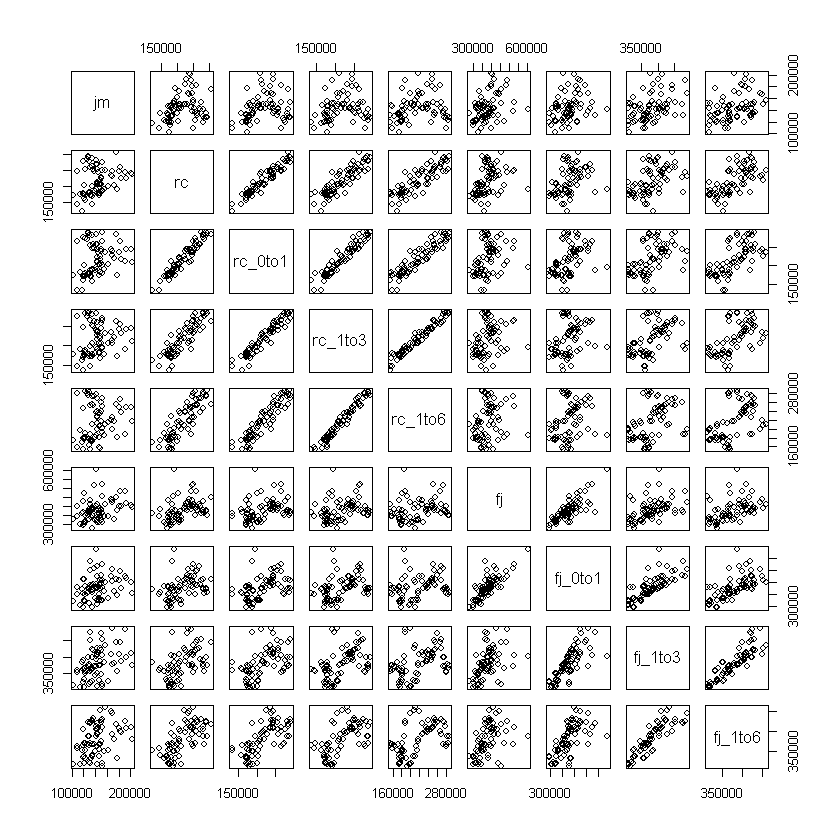

In [61]:
pairs(result[,-1])

#### (2) 다중선형회귀 수행하기

- 우선 반응변수와 독립변수 간에 선형관계가 성립한다고 가정한다.
  - 여기서 선형관계가 성립한다고 가정한 이유는 구인인원이나 구직인원이 많아질수록 취업건수에 긍정적인 영향을 미친다고 보는 것이 상식적이기 때문이다.
- 어떤 변수를 사용해서 모델을 생성할 것인지 결정해야 하는데, 많이 사용하는 방법으로 전진선택법, 후진제거법, 단계적 선택법이 있다.
- 그리고 변수를 선택함에 있어 다중공선성 문제도 확인해 봐야 한다.
  - 다중공선성을 확인하기 위해서는 car 라이브러리의 VIF 함수를 사용한다.

In [75]:
# 다중선형회귀 모델 생성
model_full = lm(jm ~ rc + rc_0to1 + rc_1to3 + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, data=result)

summary(model_full)

library(car)
vif(model_full)


Call:
lm(formula = jm ~ rc + rc_0to1 + rc_1to3 + rc_1to6 + fj + fj_0to1 + 
    fj_1to3 + fj_1to6, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-36052 -11663  -1495   9722  45851 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.067e+04  2.808e+04   1.448  0.15248   
rc           2.914e-02  2.196e-01   0.133  0.89487   
rc_0to1     -9.897e-03  3.472e-01  -0.029  0.97735   
rc_1to3     -5.226e-01  3.848e-01  -1.358  0.17920   
rc_1to6      4.779e-01  3.142e-01   1.521  0.13319   
fj           2.271e-01  8.370e-02   2.713  0.00858 **
fj_0to1     -3.290e-01  1.381e-01  -2.383  0.02019 * 
fj_1to3      3.244e-01  1.481e-01   2.190  0.03220 * 
fj_1to6      6.375e-02  1.602e-01   0.398  0.69194   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19440 on 63 degrees of freedom
Multiple R-squared:  0.3144,	Adjusted R-squared:  0.2274 
F-statistic: 3.612 on 8 and 63 DF,  p-value: 0.001638


rc   rc_0to1   rc_1to3   rc_1to6        fj   fj_0to1   fj_1to3   fj_1to6 
16.710528 38.423438 45.593599 29.195152  4.529462  8.114890  8.103941  7.010508

- 모든 변수를 포함한 전체 모델을 살펴본 결과 rc 그룹의 변수들은 vif_value 가 매우 높게 나타났다.
- 이를 개선하기 위해 vif_value가 높은 rc_1to3, rc_0to1 변수를 제외하고, 다시 모델을 적합한다.

In [78]:
# 다중선형회귀 모델 생성
model_full = lm(jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, data=result)

summary(model_full)

library(car)
vif(model_full)


Call:
lm(formula = jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, 
    data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-30222 -13103  -2580   9625  47948 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.529e+04  2.618e+04   2.112  0.03850 * 
rc          -2.775e-02  1.328e-01  -0.209  0.83510   
rc_1to6      2.774e-02  1.235e-01   0.225  0.82288   
fj           2.487e-01  8.156e-02   3.049  0.00332 **
fj_0to1     -3.681e-01  1.331e-01  -2.766  0.00737 **
fj_1to3      3.653e-01  1.445e-01   2.528  0.01392 * 
fj_1to6     -1.257e-02  1.508e-01  -0.083  0.93382   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19510 on 65 degrees of freedom
Multiple R-squared:  0.2878,	Adjusted R-squared:  0.2221 
F-statistic: 4.379 on 6 and 65 DF,  p-value: 0.000897


rc  rc_1to6       fj  fj_0to1  fj_1to3  fj_1to6 
6.067827 4.476811 4.271867 7.487943 7.660151 6.171287

- 다중공선성을 판단하는 기준이 되는 vif_value가 10 이상인 변수는 없는 것으로 나타남
- "jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6" 모델을 model_full 로 하여 전진선택법, 후진제거법, 단계적 선택법을 실행한다.

In [80]:
# 전진선택법
model_forward = step(lm(jm ~ 1, data=result), scope=formula(model_full), direction="forward")

# 후진제거법
model_backward = step(model_full, direction="backward")

# 단계적 선택법
model_both = step(lm(jm ~ 1, data=result), scope=formula(model_full), direction="both")

# 모델 요약 출력
summary(model_forward)
summary(model_backward)
summary(model_both)

Start:  AIC=1441.59
jm ~ 1

          Df  Sum of Sq        RSS    AIC
+ fj_1to3  1 5816853083 2.8918e+10 1430.4
+ fj_1to6  1 5223212663 2.9511e+10 1431.9
+ fj       1 4111001816 3.0624e+10 1434.5
+ rc       1 2823599253 3.1911e+10 1437.5
+ fj_0to1  1 2786285717 3.1948e+10 1437.6
+ rc_1to6  1 1233867890 3.3501e+10 1441.0
<none>                  3.4735e+10 1441.6

Step:  AIC=1430.4
jm ~ fj_1to3

          Df  Sum of Sq        RSS    AIC
+ fj       1 1022516840 2.7895e+10 1429.8
<none>                  2.8918e+10 1430.4
+ rc       1  281999963 2.8636e+10 1431.7
+ fj_1to6  1  120013938 2.8798e+10 1432.1
+ fj_0to1  1   77780029 2.8840e+10 1432.2
+ rc_1to6  1   24682912 2.8893e+10 1432.3

Step:  AIC=1429.8
jm ~ fj_1to3 + fj

          Df  Sum of Sq        RSS    AIC
+ fj_0to1  1 3132467301 2.4763e+10 1423.2
<none>                  2.7895e+10 1429.8
+ rc       1  116944955 2.7778e+10 1431.5
+ fj_1to6  1   87532402 2.7808e+10 1431.6
+ rc_1to6  1   11319986 2.7884e+10 1431.8

Step:  AIC=1423.23


Call:
lm(formula = jm ~ fj_1to3 + fj + fj_0to1, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05



Call:
lm(formula = jm ~ fj + fj_0to1 + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05



Call:
lm(formula = jm ~ fj_1to3 + fj + fj_0to1, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05


- 어떤 방법을 사용하더라도 적합된 모형은 "jm ~ fj_1to3 + fj + fj_0to1" 이다.

- fj_0to1은 fj와도 1개월의 수치가 겹치고, fj_1to3과도 1개월의 수치가 겹치기 때문에 "jm ~ fj + fj_1to3" 모델도 적합해보았다.

In [81]:
# jm ~ fj_1to3 + rc_1to6" 모델을 적합
model1 = lm(jm ~ fj + fj_1to3, data=result)
summary(model1)

# jm ~ fj_1to3 + rc_1to6" 모델을 적합
model2 = lm(jm ~ fj + fj_0to1 + fj_1to3, data=result)
summary(model2)


Call:
lm(formula = jm ~ fj + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-31514 -12796  -3927  12734  58181 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.588e+04  2.165e+04   2.582   0.0120 *
fj          7.332e-02  4.610e-02   1.590   0.1163  
fj_1to3     1.584e-01  6.099e-02   2.598   0.0115 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20110 on 69 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1736 
F-statistic: 8.459 on 2 and 69 DF,  p-value: 0.0005182



Call:
lm(formula = jm ~ fj + fj_0to1 + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05


- 예상외로 fj_0to1을 제외한 경우 모델의 설명력이 크게 저하되었다.
- fj_0to1의 계수가 -0.3559인 것을 감안하면 취업건수와 구직인원수 사이에 비선형성이 존재하고, fj_0to1 변수를 통해 비선형성에 대한 설명이 이루어지기 때문이라고 예상했다.
- 최종 모형은 "jm ~ fj + fj_0to1 + fj_1to3" 이다.
  - 적합된 결과는 $jm = 55970 + 0.2399\cdot fj - 0.3559\cdot fj_{0to1} + 0.3475\cdot fj_{1to3}$ 이다.
  - 취업건수를 예측함에 있어 해당 월의 구직건수(fj)와 1개월 전부터 3개월 전까지의 구직건수(fj_1to3)는 취업건수를 더 크게 예측하게 하고, \
  해당 월의 구직건수와 1개월 전의 구직건수의 합(fj_0to1)은 취업건수를 더 작게 예측하게 한다.

- [참고] 적합된 식을 다르게 표현하면 $jm = 55970 + 0.2399\cdot fj_0 - 0.1780\cdot (fj_0 + fj_1) + 0.1158\cdot (fj_1 + fj_2 + fj_3)$ 이고,
  - 이를 정리하면 $jm = 55790 + 0.0619\cdot fj_0 - 0.0622\cdot fj_1 + 0.1158\cdot fj_2 + 0.1158\cdot fj_3$ 이 된다.

적합된 결과는 $jm = 55970 + 0.2399\cdot fj - 0.3559\cdot fj_{0to1} + 0.3475\cdot fj_{1to3}$ 이다.

이 식을 활용하여 agg 변수에서 month가 79이상인 값(즉, 2023년 하반기)의 취업건수를 예측해보고, 실제 값과 비교해본다.

In [ ]:
test_set = agg[agg$month>=79,]

test_set$predicted_jm = 55970 + 0.2399 * test_set$fj - 0.3599 * test_set$fj_0to1 + 0.3475 * test_set$fj_1to3
test_set$diff = test_set$jm - test_set$predicted_jm

test_set

,month,rc,fj,jm,rc_0to1,rc_1to3,rc_1to6,fj_0to1,fj_1to3,fj_1to6,predicted_jm,diff
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,79,231802,387359,140918,243497.5,248796.7,253791.0,387999.0,387392.0,429460.5,143875.3,-2957.304
80,80,250684,368165,131946,241243.0,249661.0,251262.8,377762.0,390728.7,407437.8,144114.5,-12168.451
81,81,227271,336295,128790,238977.5,245893.0,248064.5,352230.0,381387.7,400031.5,142411.8,-13621.808
82,82,237384,379926,113965,232327.5,236585.7,242691.2,358110.5,363939.7,375665.8,144699.3,-30734.313
83,83,238626,376706,124458,238005.0,238446.3,244053.7,378316.0,361462.0,376095.3,135793.9,-11335.886
84,84,196386,351074,93504,217506.0,234427.0,240160.0,363890.0,364309.0,372848.3,135826.0,-42322.019


-

In [71]:
# jm ~ fj_1to3" 모델을 적합
model2 = lm(jm ~ fj_1to3, data=result)
summary(model2)


Call:
lm(formula = jm ~ fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-31747 -13548  -5173  12216  59638 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.637e+04  2.084e+04   3.185 0.002162 ** 
fj_1to3     2.041e-01  5.439e-02   3.752 0.000358 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20330 on 70 degrees of freedom
Multiple R-squared:  0.1675,	Adjusted R-squared:  0.1556 
F-statistic: 14.08 on 1 and 70 DF,  p-value: 0.000358


In [20]:
rc2 = aggregate(신규구인인원수 ~ 마감년월 + 표준산업대분류, data=rc, sum, na.rm=TRUE)

In [21]:
summary(rc2)

    마감년월      표준산업대분류     신규구인인원수  
 Min.   :201701   Length:1762        Min.   :     1  
 1st Qu.:201809   Class :character   1st Qu.:  1571  
 Median :202006   Mode  :character   Median :  4970  
 Mean   :202006                      Mean   : 10508  
 3rd Qu.:202204                      3rd Qu.: 11118  
 Max.   :202312                      Max.   :126198  

In [22]:
nrow(rc)
nrow(rc2)

[1] 7074327

[1] 1762

In [23]:
head(rc2[order(-rc2$신규구인인원수),], 10)

,마감년월,표준산업대분류,신규구인인원수
,<int>,<chr>,<int>
231,202203,C,126198
237,202209,C,119693
171,201703,C,117791
234,202206,C,112303
233,202205,C,111195
239,202211,C,108108
232,202204,C,108045
235,202207,C,107222
174,201706,C,105107


In [24]:
# '마감년월'에서 연도만 추출하여 새로운 '연도' 변수 추가
rc$연도 <- substr(as.character(rc$마감년월), 1, 4)

# 연도별 신규구인인원수 합계 구하기
yearly_recruitment <- aggregate(신규구인인원수 ~ 연도, data = rc, sum)

# 결과 출력
print(yearly_recruitment)

  연도 신규구인인원수
1 2017        2852664
2 2018        2436823
3 2019        2128728
4 2020        2045112
5 2021        2829040
6 2022        3317302
7 2023        2904899


In [25]:
# '마감년월'에서 연도만 추출하여 새로운 '연도' 변수 추가
rc2$연도 <- substr(as.character(rc2$마감년월), 1, 4)

# 연도별 신규구인인원수 합계 구하기
yearly_recruitment_rc2 <- aggregate(신규구인인원수 ~ 연도, data = rc2, sum)

# 결과 출력
print(yearly_recruitment_rc2)


  연도 신규구인인원수
1 2017        2852664
2 2018        2436823
3 2019        2128728
4 2020        2045112
5 2021        2829040
6 2022        3317302
7 2023        2904899


In [26]:
# 파일 이름 리스트 작성
file_names <- c(  
  "find_job_2017.txt",
  "find_job_2018.txt",
  "find_job_2019.txt",
  "find_job_2020.txt",
  "find_job_2021.txt",
  "find_job_2022.txt",
  "find_job_2023.txt"
)

# 파일을 하나씩 읽어서 병합
fj <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [27]:
head(fj)

summary(fj)

,마감년월,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,신규구직인원수
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,70000,2007,10,45,45130,M,3,4,1
2,201712,130000,2007,10,48,48310,M,6,5,1
3,201712,40000,2007,10,45,45130,F,3,4,2
4,201712,60000,2007,10,45,45130,F,8,3,3
5,201712,150000,2007,10,45,45130,M,4,3,2
6,201712,190000,2007,99,45,45130,M,4,5,1


    마감년월       직종중분류           직종버전       고용형태    
 Min.   :201701   Length:24907211    Min.   :2007   Min.   :10.00  
 1st Qu.:201811   Class :character   1st Qu.:2018   1st Qu.:10.00  
 Median :202010   Mode  :character   Median :2018   Median :11.00  
 Mean   :202019                      Mean   :2016   Mean   :42.89  
 3rd Qu.:202205                      3rd Qu.:2018   3rd Qu.:99.00  
 Max.   :202312                      Max.   :2018   Max.   :99.00  
   거주시도          거주시군구            성별            연령5세단위    
 Length:24907211    Length:24907211    Length:24907211    Min.   : 3.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 6.000  
                                                          Mean   : 6.152  
                                                          3rd Qu.: 8.000  
                                                          Max.   :12.000  
     학력           신규구직인원수    
 L

In [28]:
fj2 = aggregate(신규구직인원수 ~ 마감년월, data=fj, sum, na.rm=TRUE)

In [29]:
# 파일 이름 리스트 작성
file_names <- c(  
  "job_matching_2017.txt",
  "job_matching_2018.txt",
  "job_matching_2019.txt",
  "job_matching_2020.txt",
  "job_matching_2021.txt",
  "job_matching_2022.txt",
  "job_matching_2023.txt"
)

# 파일을 하나씩 읽어서 병합
jm <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [30]:
head(jm)

summary(jm)

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,26,26000,y,y,110000,2007,10,26,26200,M,10,3,2
2,201712,26,26320,y,y,220000,2007,99,26,26320,M,10,3,1
3,201712,41,41130,y,y,110000,2007,10,41,41610,M,11,3,1
4,201712,42,42810,y,y,230000,2007,20,42,42810,M,7,3,1
5,201712,43,43113,S,10,120000,2007,10,43,43114,F,3,5,1
6,201712,11,11380,y,y,110000,2007,10,11,11380,F,3,4,1


    마감년월        근무시도          근무시군구        표준산업대분류    
 Min.   :201701   Length:9412398     Length:9412398     Length:9412398    
 1st Qu.:201807   Class :character   Class :character   Class :character  
 Median :202007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :202002                                                           
 3rd Qu.:202203                                                           
 Max.   :202312                                                           
   산업버전          직종중분류           직종버전       고용형태    
 Length:9412398     Length:9412398     Min.   :2007   Min.   :10.00  
 Class :character   Class :character   1st Qu.:2018   1st Qu.:10.00  
 Mode  :character   Mode  :character   Median :2018   Median :10.00  
                                       Mean   :2016   Mean   :35.66  
                                       3rd Qu.:2018   3rd Qu.:99.00  
                                       Max.   :2018   Max.   :99.00  
   거주시도          거주시군구

In [31]:
jm2 = aggregate(취업건수 ~ 마감년월+표준산업대분류, data=jm, sum, na.rm=TRUE)

In [32]:
head(jm2)

summary(jm2)

,마감년월,표준산업대분류,취업건수
,<int>,<chr>,<int>
1,201701,A,376
2,201702,A,468
3,201703,A,591
4,201704,A,460
5,201705,A,472
6,201706,A,412


    마감년월      표준산업대분류        취업건수       
 Min.   :201701   Length:1783        Min.   :     1.0  
 1st Qu.:201809   Class :character   1st Qu.:   169.5  
 Median :202006   Mode  :character   Median :   563.0  
 Mean   :202005                      Mean   :  6845.5  
 3rd Qu.:202203                      3rd Qu.:  2812.0  
 Max.   :202312                      Max.   :178210.0  

In [33]:
# 마감년월을 연도와 월로 분리하고 새롭게 변환된 값으로 변경
convert_month <- function(df) {
  # 마감년월을 연도와 월로 분리
  year <- floor(df$마감년월 / 100)  # 연도 추출 (2017, 2018, ...)
  month <- df$마감년월 %% 100      # 월 추출 (01, 02, ...)
  
  # 기준 연도를 설정하고, 마감년월을 1부터 시작하도록 변경
  base_year <- min(year)  # 가장 작은 연도를 기준으로 설정
  df$마감년월 <- (year - base_year) * 12 + month  # (연도 차이 * 12) + 월
  
  return(df)
}

# rc2, fj2, jm2 모두 적용
rc2 <- convert_month(rc2)
fj2 <- convert_month(fj2)
jm2 <- convert_month(jm2)

In [34]:
head(rc2)

,마감년월,표준산업대분류,신규구인인원수,연도
,<dbl>,<chr>,<int>,<chr>
1,1,A,7945,2017
2,2,A,4448,2017
3,3,A,14965,2017
4,4,A,5669,2017
5,5,A,3921,2017
6,6,A,5961,2017


In [35]:
# 1. 2018년 이후 자료만 필터링
jm2_filtered <- jm2[jm2$마감년월 >= 13, ]  # 201801부터 사용 (마감년월 = 13은 2018년 1월)

# 2. 6개월 이전 데이터 생성 함수 (표준산업대분류도 고려)
create_lagged_data <- function(df, target_col) {
  lagged_data <- data.frame()  # 빈 데이터프레임 생성
  
  # 각 마감년월에 대해 이전 6개월 데이터를 붙여주기
  for(i in 7:nrow(df)) {  # 6개월 이상의 데이터부터 시작
    temp_row <- df[i, ]
    for(j in 1:6) {
      temp_row[[paste(j, "개월전", target_col, sep = "_")]] <- df[i - j, target_col]
    }
    lagged_data <- rbind(lagged_data, temp_row)
  }
  
  return(lagged_data)
}

# 3. rc2와 fj2 데이터에서 신규구인인원수, 신규구직인원수 컬럼을 이전 6개월치로 변환
rc2_lagged <- create_lagged_data(rc2, "신규구인인원수")
fj2_lagged <- create_lagged_data(fj2, "신규구직인원수")

# 4. 6개월치 데이터를 합치기 (마감년월과 표준산업대분류 기준으로 병합)
# `jm2_filtered`는 마감년월 기준으로 이미 필터링된 데이터입니다.
result <- merge(jm2_filtered, rc2_lagged, by = c("마감년월", "표준산업대분류"), all.x = TRUE)
result <- merge(result, fj2_lagged, by = "마감년월", all.x = TRUE)

# 결과 확인
head(result)


,마감년월,표준산업대분류,취업건수,신규구인인원수,연도,1_개월전_신규구인인원수,2_개월전_신규구인인원수,3_개월전_신규구인인원수,4_개월전_신규구인인원수,5_개월전_신규구인인원수,6_개월전_신규구인인원수,신규구직인원수,1_개월전_신규구직인원수,2_개월전_신규구직인원수,3_개월전_신규구직인원수,4_개월전_신규구직인원수,5_개월전_신규구직인원수,6_개월전_신규구직인원수
,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,13,A,247,9250,2018,9570,3934,3913,6638,4266,5104,434846,375863,400080,354656,406449,399056,417453
2,13,B,6,173,2018,108,153,188,167,177,192,434846,375863,400080,354656,406449,399056,417453
3,13,C,5209,86247,2018,68258,79808,75990,92156,87426,81378,434846,375863,400080,354656,406449,399056,417453
4,13,D,22,468,2018,376,404,368,375,532,493,434846,375863,400080,354656,406449,399056,417453
5,13,E,89,1461,2018,1110,1274,1105,1256,1394,1259,434846,375863,400080,354656,406449,399056,417453
6,13,F,429,13404,2018,12298,12735,11618,12910,13446,14549,434846,375863,400080,354656,406449,399056,417453


In [36]:
result

마감년월,표준산업대분류,취업건수,신규구인인원수,연도,1_개월전_신규구인인원수,2_개월전_신규구인인원수,3_개월전_신규구인인원수,4_개월전_신규구인인원수,5_개월전_신규구인인원수,6_개월전_신규구인인원수,신규구직인원수,1_개월전_신규구직인원수,2_개월전_신규구직인원수,3_개월전_신규구직인원수,4_개월전_신규구직인원수,5_개월전_신규구직인원수,6_개월전_신규구직인원수
<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13,A,247,9250,2018,9570,3934,3913,6638,4266,5104,434846,375863,400080,354656,406449,399056,417453
13,B,6,173,2018,108,153,188,167,177,192,434846,375863,400080,354656,406449,399056,417453
13,C,5209,86247,2018,68258,79808,75990,92156,87426,81378,434846,375863,400080,354656,406449,399056,417453
13,D,22,468,2018,376,404,368,375,532,493,434846,375863,400080,354656,406449,399056,417453
13,E,89,1461,2018,1110,1274,1105,1256,1394,1259,434846,375863,400080,354656,406449,399056,417453
13,F,429,13404,2018,12298,12735,11618,12910,13446,14549,434846,375863,400080,354656,406449,399056,417453
13,G,1033,14873,2018,12877,15774,15525,16449,18213,16087,434846,375863,400080,354656,406449,399056,417453
13,H,466,4724,2018,3653,4465,4661,4470,5224,4488,434846,375863,400080,354656,406449,399056,417453
13,I,920,4799,2018,4622,7358,6168,7355,8373,7225,434846,375863,400080,354656,406449,399056,417453


In [37]:
# 상관 분석
cor_result <- cor(result[, c("취업건수", 
                              "신규구인인원수", 
                              "1_개월전_신규구인인원수", 
                              "2_개월전_신규구인인원수", 
                              "3_개월전_신규구인인원수", 
                              "4_개월전_신규구인인원수", 
                              "5_개월전_신규구인인원수", 
                              "6_개월전_신규구인인원수", 
                              "신규구직인원수", 
                              "1_개월전_신규구직인원수", 
                              "2_개월전_신규구직인원수", 
                              "3_개월전_신규구직인원수", 
                              "4_개월전_신규구직인원수", 
                              "5_개월전_신규구직인원수", 
                              "6_개월전_신규구직인원수")])

# 상관행렬 출력
print(cor_result)

                           취업건수 신규구인인원수 1_개월전_신규구인인원수
취업건수                1.000000000             NA                      NA
신규구인인원수                   NA              1                      NA
1_개월전_신규구인인원수          NA             NA                       1
2_개월전_신규구인인원수          NA             NA                      NA
3_개월전_신규구인인원수          NA             NA                      NA
4_개월전_신규구인인원수          NA             NA                      NA
5_개월전_신규구인인원수          NA             NA                      NA
6_개월전_신규구인인원수          NA             NA                      NA
신규구직인원수          0.015416310             NA                      NA
1_개월전_신규구직인원수 0.005745450             NA                      NA
2_개월전_신규구직인원수 0.020296650             NA                      NA
3_개월전_신규구직인원수 0.016605483             NA                      NA
4_개월전_신규구직인원수 0.008494506             NA                      NA
5_개월전_신규구직인원수 0.001212957             NA                      NA
6_개월전_신규구직인원수 0.00878619